In [48]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (8,5)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

In [49]:
df2=pd.read_csv('./datos/limpieza_holidays_bien.csv',index_col=0)

In [50]:
df2.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,4,0,1,1,1,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,2018-02-01,4,0,1,0,2,1,2,14.90,17.69,69.61,16.65,131,670,801
2,3,2018-03-01,4,0,1,0,3,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2018-04-01,4,0,1,0,4,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2018-05-01,4,0,1,0,5,1,1,9.31,11.46,43.70,12.52,82,1518,1600
5,6,2018-06-01,4,0,1,0,6,0,1,8.38,11.66,51.83,6.00,88,1518,1606
6,7,2018-07-01,4,0,1,0,7,0,2,8.06,10.44,49.87,11.30,148,1362,1510
7,8,2018-08-01,4,0,1,0,1,1,2,6.76,8.11,53.58,17.88,68,891,959
8,9,2018-09-01,4,0,1,0,2,1,1,5.67,5.81,43.42,24.25,54,768,822
9,10,2018-10-01,4,0,1,0,3,1,1,6.18,7.54,48.29,14.96,41,1280,1321


In [51]:
df22=df2[['weathersit','atemp','hum','windspeed']]

<AxesSubplot:>

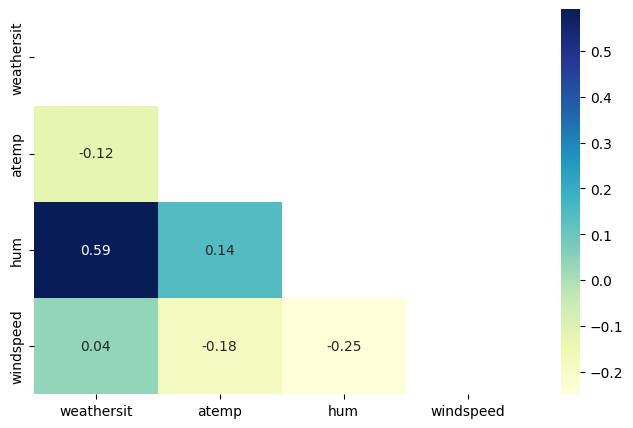

In [52]:
mask = np.triu(np.ones_like(df22.corr(), dtype = np.bool))
sns.heatmap(df22.corr(), cmap = "YlGnBu",mask=mask,annot=True)

- 'hum' y 'weathersit' están MUY relacionadas (CORRELACIÓN FUERTE), seguidas por 'hum' y 'atemp' (CORRELACIÓN DÉBIL)

In [53]:
df5=df2[['weathersit','atemp','hum','windspeed','cnt']]

<AxesSubplot:>

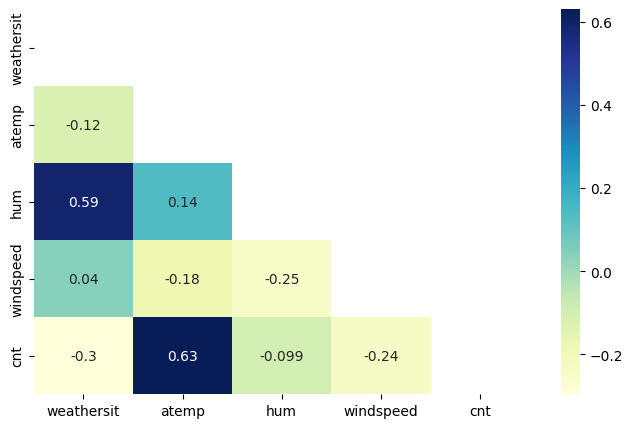

In [54]:
mask = np.triu(np.ones_like(df5.corr(), dtype = np.bool))
sns.heatmap(df5.corr(), cmap = "YlGnBu",mask=mask,annot=True)

- esta claro que la temperatura 'atemp' (sensación termica) esta DIRECTAMENTE relacionada con la cantidad de bicis que se alquilan

- las otras no son tan relevantes

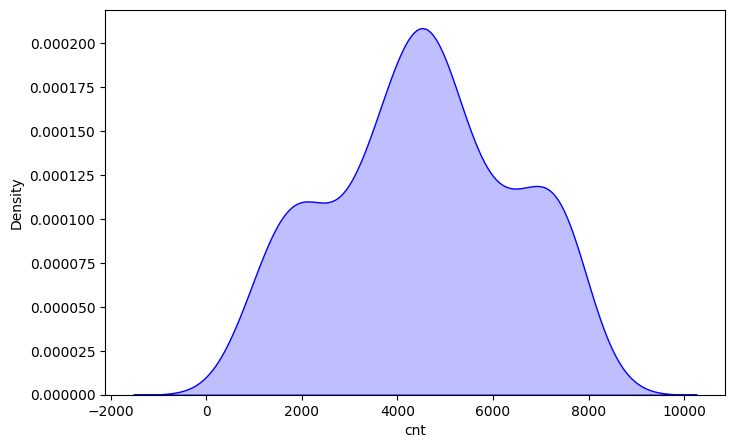

In [55]:
sns.distplot(
    df2["cnt"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

- TIENE FORMA DE CAMPANA DE GAUSS --> TIENE UNA DISTRIBUCIÓN NORMAL

In [56]:
df3=df2[['holiday','workingday','cnt']]

<AxesSubplot:>

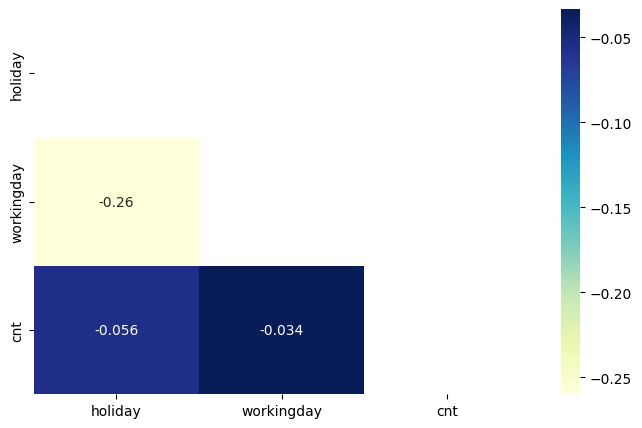

In [57]:
mask = np.triu(np.ones_like(df3.corr(), dtype = np.bool))
sns.heatmap(df3.corr(), cmap = "YlGnBu",mask=mask,annot=True)

- Esta gráfica la he hecho para ver si influyen los holidays en el conteo y se ve que no.

<AxesSubplot:>

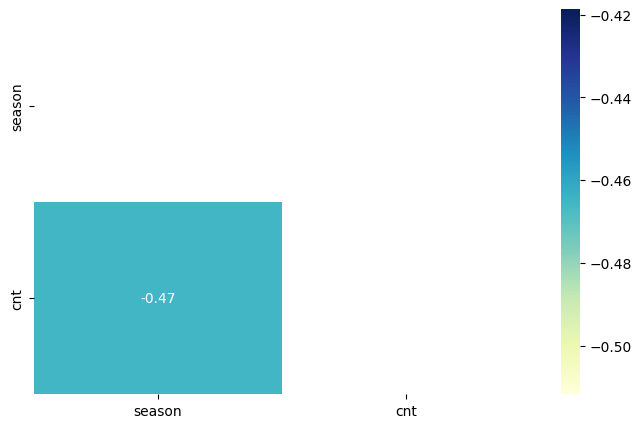

In [58]:
df4=df2[['season','cnt']]
mask = np.triu(np.ones_like(df4.corr(), dtype = np.bool))
sns.heatmap(df4.corr(), cmap = "YlGnBu",mask=mask,annot=True)

- CORRELACIÓN  INVERSA MODERADA

In [59]:
from scipy.stats import skew

In [60]:
df2['cnt'].skew()

-0.04958060487648213

- asimetrico negativo pero muy cerca del cero

In [61]:
mapa={1:'sprint',2:'summer',3:'autumn',4:'invierno'}

In [62]:
df4['season']=df4['season'].map(mapa)

<AxesSubplot:xlabel='season', ylabel='cnt'>

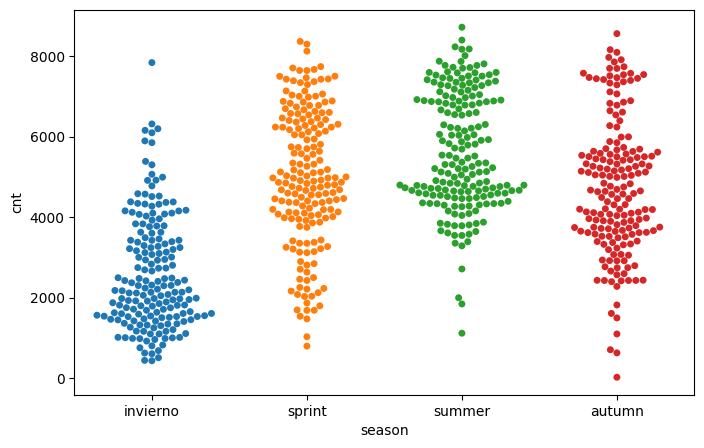

In [63]:
sns.swarmplot(df4['season'],df4['cnt'])

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

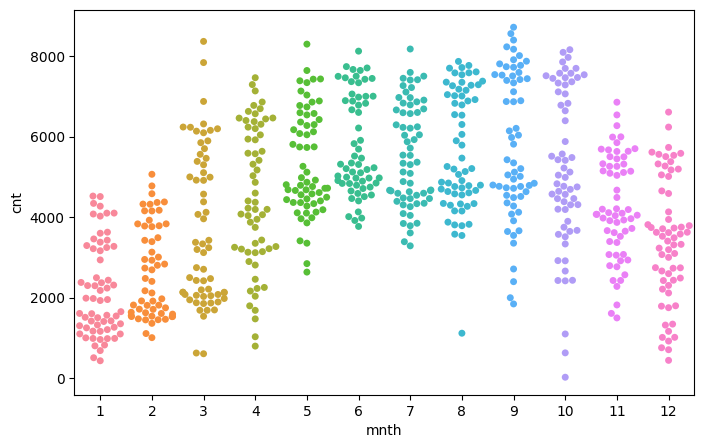

In [64]:
df7=df2[['mnth','cnt']]
sns.swarmplot(df7['mnth'],df4['cnt'])

<AxesSubplot:xlabel='mnth'>

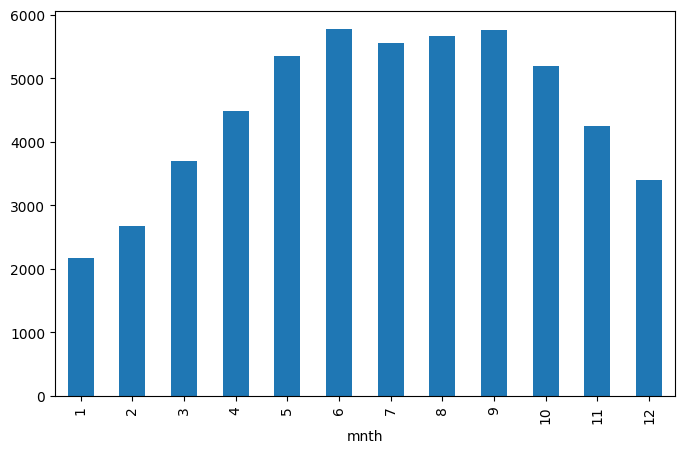

In [65]:
df8=df2.groupby(['mnth'])['cnt'].mean()
df8.plot.bar()